### Advanced Data Visualisation

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Smoking Dataset

In [44]:
smoking = pd.read_csv('/Users/georgiosskourlis/Documents/Analyst Builder/Pandas for Data Analysis/smoking.csv'
                , encoding = "ISO-8859-1")

smoking

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


In [45]:
smokers = smoking[smoking['smoke'] == 'Yes']

In [46]:
female_smokers = smokers[smokers['gender'] == 'Female']
male_smokers = smokers[smokers['gender'] == 'Male']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


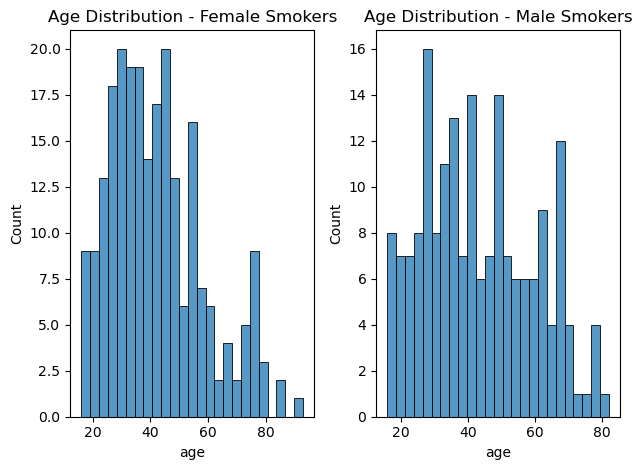

In [47]:
fig, axs = plt.subplots(1,2)

sns.histplot(female_smokers['age'], bins = 25, ax = axs[0])
axs[0].set_title('Age Distribution - Female Smokers')
             
sns.histplot(male_smokers['age'], bins = 25, ax = axs[1])
axs[1].set_title('Age Distribution - Male Smokers')

plt.tight_layout()
plt.show()
             

In [48]:
smoking.corr()

ValueError: could not convert string to float: 'Male'

### Housing Dataset

In [54]:
housing = pd.read_csv('/Users/georgiosskourlis/Documents/Analyst Builder/Pandas for Data Analysis/real_estate.csv'
                , encoding = "ISO-8859-1")

housing_filt = housing.drop(['status','city','state', 'prev_sold_date', 'zip_code'], axis = 1)

In [55]:
housing_filt

,bed,bath,acre_lot,house_size,price
0,3.0,2.0,0.12,920.0,105000.0
1,4.0,2.0,0.08,1527.0,80000.0
2,2.0,1.0,0.15,748.0,67000.0
3,4.0,2.0,0.10,1800.0,145000.0
4,6.0,2.0,0.05,NaN,65000.0
...,...,...,...,...,...
99995,3.0,3.0,NaN,2864.0,749900.0
99996,2.0,1.0,0.34,1075.0,349900.0
99997,3.0,2.0,1.01,1632.0,549000.0
99998,3.0,2.0,0.12,1332.0,299000.0


In [60]:
correlation = housing_filt.corr()

<Axes: >

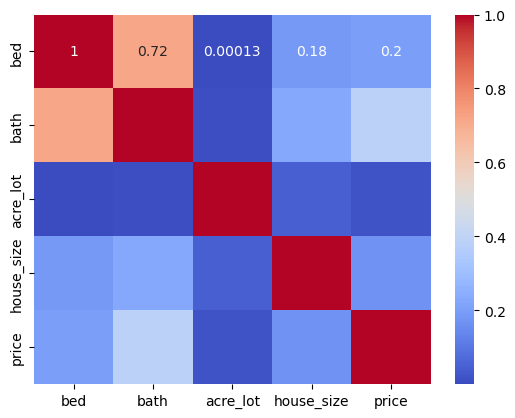

In [61]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')


In [62]:
pearson_correlation = housing_filt.corr(method = 'pearson')
pearson_correlation

,bed,bath,acre_lot,house_size,price
bed,1.000000,0.715531,0.000135,0.184645,0.199924
bath,0.715531,1.000000,0.005751,0.226905,0.383401
acre_lot,0.000135,0.005751,1.000000,0.045852,0.018991
house_size,0.184645,0.226905,0.045852,1.000000,0.171422
price,0.199924,0.383401,0.018991,0.171422,1.000000


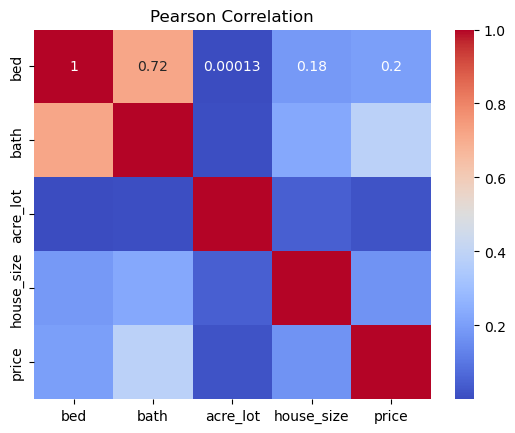

In [69]:
sns.heatmap(pearson_correlation, annot = True, cmap = 'coolwarm')
plt.title('Pearson Correlation')
plt.show()

In [63]:
spearman_correlation = housing_filt.corr(method = 'spearman')
spearman_correlation

,bed,bath,acre_lot,house_size,price
bed,1.000000,0.578902,-0.019011,0.662115,0.271416
bath,0.578902,1.000000,0.235296,0.764824,0.571183
acre_lot,-0.019011,0.235296,1.000000,0.285697,0.133805
house_size,0.662115,0.764824,0.285697,1.000000,0.656269
price,0.271416,0.571183,0.133805,0.656269,1.000000


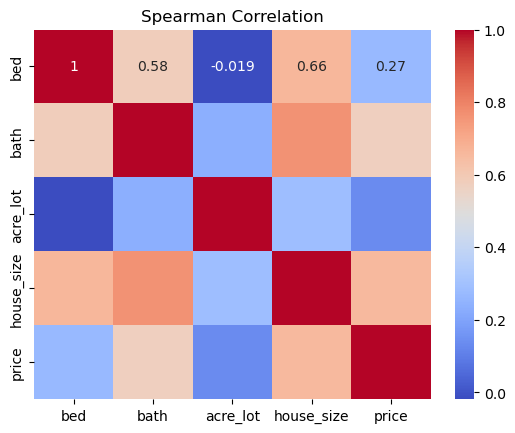

In [66]:
sns.heatmap(spearman_correlation, annot = True, cmap = 'coolwarm')
plt.title('Spearman Correlation')
plt.show()

In [64]:
kendall_correlation = housing_filt.corr(method = 'kendall')
kendall_correlation

,bed,bath,acre_lot,house_size,price
bed,1.000000,0.498775,-0.013599,0.524954,0.202597
bath,0.498775,1.000000,0.177513,0.632030,0.449005
acre_lot,-0.013599,0.177513,1.000000,0.196272,0.102153
house_size,0.524954,0.632030,0.196272,1.000000,0.479540
price,0.202597,0.449005,0.102153,0.479540,1.000000


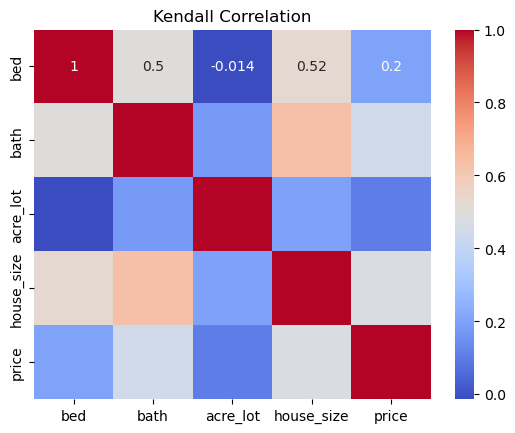

In [67]:
sns.heatmap(kendall_correlation, annot = True, cmap = 'coolwarm')
plt.title('Kendall Correlation')
plt.show()

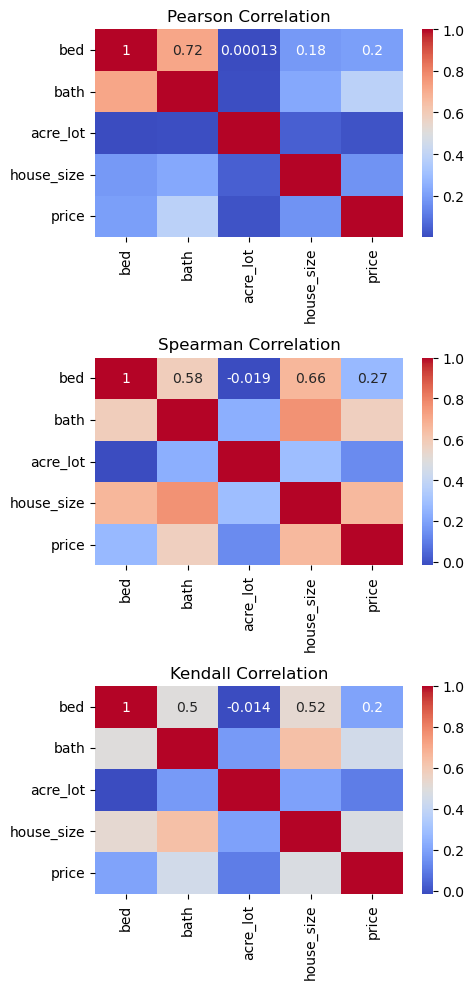

In [71]:
fig, axs = plt.subplots(3,1, figsize = (5,10))

sns.heatmap(pearson_correlation, annot = True, cmap = 'coolwarm', ax = axs[0])
axs[0].set_title('Pearson Correlation')

sns.heatmap(spearman_correlation, annot = True, cmap = 'coolwarm', ax = axs[1])
axs[1].set_title('Spearman Correlation')

sns.heatmap(kendall_correlation, annot = True, cmap = 'coolwarm', ax = axs[2])
axs[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()